<a href="https://colab.research.google.com/github/YuvrazError/Healthcare-Dataset-Analysis/blob/main/Healthcare_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

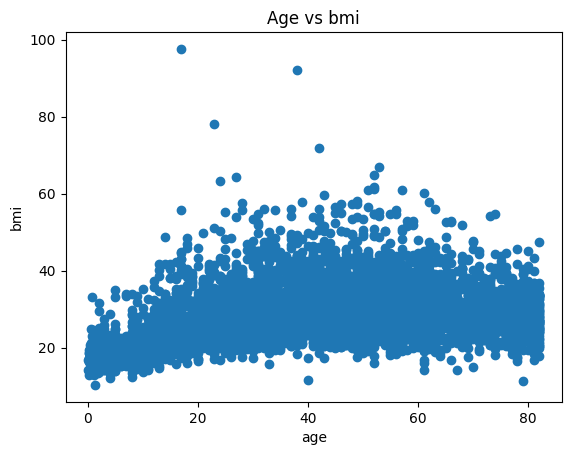

In [ ]:
plt.title('Age vs bmi')
%matplotlib inline
plt.xlabel('age')
plt.ylabel('bmi')
plt.scatter(df['age'], df['bmi'])


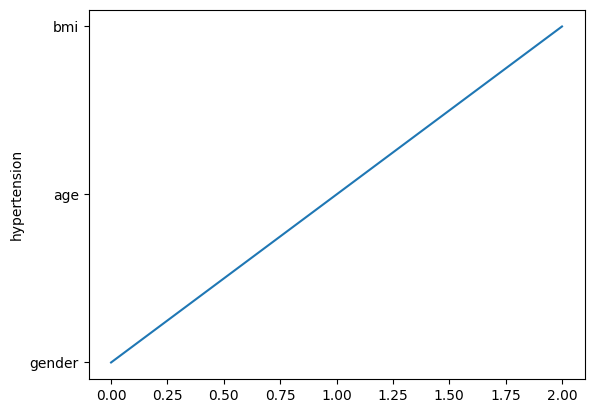

In [ ]:
plt.plot(['gender', 'age', 'bmi'])
plt.ylabel('hypertension')
plt.show()

<ipython-input-9-af1ca5e95eb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


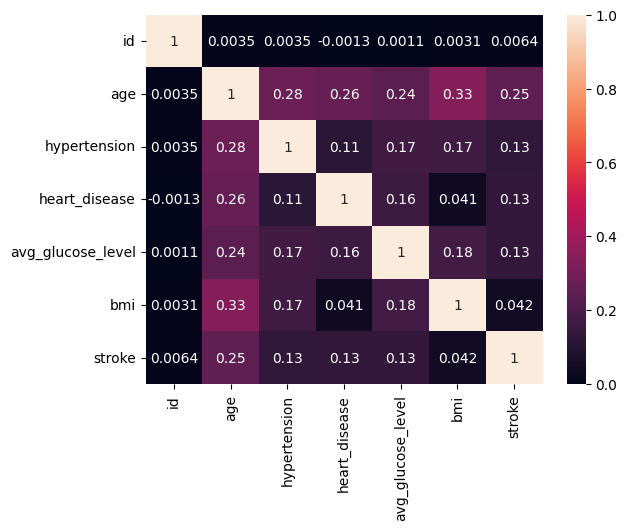

In [ ]:
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
print(df.corr())

                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.003084  0.006388  
age                         0.238171  0.333398  0.245257  
hypertension                0.174474  0.167811  0.127904  
heart_disease               0.161857  0.041357  0.134914  
avg_glucose_level           1.000000  0.175502  0.131945  
bmi                         0.175502  1.000000  0.042374  
stroke                    

<ipython-input-10-23236a4e6045>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [ ]:
new_df = df.drop(["id", "ever_married", "work_type", "Residence_type", "gender"], axis='columns')
new_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,228.69,36.6,formerly smoked,1
1,61.0,0,0,202.21,NaN,never smoked,1
2,80.0,0,1,105.92,32.5,never smoked,1
3,49.0,0,0,171.23,34.4,smokes,1
4,79.0,1,0,174.12,24.0,never smoked,1


In [ ]:
dummies = pd.get_dummies(new_df.smoking_status)
dummies

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [ ]:
merged = pd.concat([new_df, dummies], axis='columns')
merged

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,formerly smoked,1,0,1,0,0
1,61.0,0,0,202.21,NaN,never smoked,1,0,0,1,0
2,80.0,0,1,105.92,32.5,never smoked,1,0,0,1,0
3,49.0,0,0,171.23,34.4,smokes,1,0,0,0,1
4,79.0,1,0,174.12,24.0,never smoked,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,never smoked,0,0,0,1,0
5106,81.0,0,0,125.20,40.0,never smoked,0,0,0,1,0
5107,35.0,0,0,82.99,30.6,never smoked,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,formerly smoked,0,0,1,0,0


In [ ]:
newdf = merged.drop(['Unknown'], axis= 'columns')
newdf.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,formerly smoked,1,1,0,0
1,61.0,0,0,202.21,NaN,never smoked,1,0,1,0
2,80.0,0,1,105.92,32.5,never smoked,1,0,1,0
3,49.0,0,0,171.23,34.4,smokes,1,0,0,1
4,79.0,1,0,174.12,24.0,never smoked,1,0,1,0


In [ ]:
final = newdf.drop(['formerly smoked', 'smoking_status'], axis='columns')
final.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0
2,80.0,0,1,105.92,32.5,1,1,0
3,49.0,0,0,171.23,34.4,1,0,1
4,79.0,1,0,174.12,24.0,1,1,0


In [ ]:
X = final.drop('stroke', axis='columns')
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,never smoked,smokes
0,67.0,0,1,228.69,36.6,0,0
1,61.0,0,0,202.21,NaN,1,0
2,80.0,0,1,105.92,32.5,1,0
3,49.0,0,0,171.23,34.4,0,1
4,79.0,1,0,174.12,24.0,1,0
...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,1,0
5106,81.0,0,0,125.20,40.0,1,0
5107,35.0,0,0,82.99,30.6,1,0
5108,51.0,0,0,166.29,25.6,0,0


In [ ]:
y = final.stroke
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
model = LinearRegression()

In [ ]:
df.dropna(inplace=True)

In [ ]:
pipeline = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [ ]:
pipeline = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())

In [ ]:
pipeline.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [ ]:
pipeline.predict(X)

array([0.1867604 , 0.1017111 , 0.16320424, ..., 0.00606438, 0.08963053,
       0.04757236])

In [ ]:
pipeline.score(X,y)

0.0766129508818062

In [ ]:
pipeline.predict([[30,1,0,10,255,54,9]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([-1.25037966])